# 2. 신경망의 수학적 구성요소

케라스 파이썬 라이브러리를 사용하여 손글씨 숫자 분류를 학습하는 구체적인 신경망 예제를 살펴보겠습니다.

흑백 손글씨 숫자 이미지 ($28 \times 28$ 픽셀)를 10개의 범주(0에서 9까지)로 분류하는 것입니다. 1980년대 미국 국립표준기술연구소(NIST)에서 수집한 6만개의 훈련 이미지와 1만개의 테스트 이미지로 구성되어 있습니다. 

::: {.callout-note}
머신러닝에서 분류 문제의 **범주(category)** 를 **클래스(class)** 라고 합니다. 데이터 포인트는 **샘플(sample)** 이라고 합니다. 특정 샘플의 클래스는 **레이블(label)** 이라고 합니다.
:::

## 2.1 신경망 intro

`-` 케라스에서 MNIST 데이터셋 적재 

MNIST 데이터셋은 Numpy 배열 형태로 케라스에 이미 포함되어 있습니다.

In [2]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [6]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
len(train_labels), len(test_labels)

(60000, 10000)

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

`-` 신경망 구조

In [11]:
from keras import models
from keras import layers

In [13]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

신경망이 준비를 마치기 위해서 컴파일 단계에 포함될 세가지가 더 필요합니다.

- **`손실함수(loss function)`** : 훈련 데이터에서 신경망의 성능을 측정하는 방법으로 네트워크가 옳은 방향으로 학습할 수 있도록 도와줍니다.
- **`옵티마이저(optimizer)`** : 입력된 데이터와 손실함수를 기반으로 네트워크를 업데이트하는 메커니즘입니다.
- **`훈련과 테스트 과정을 모니터링할 지표`** : 여기에서는 정확도(정확히 분류된 이미지의 비율)만 고려하겠습니다.

`-` 컴파일 단계

In [14]:
network.compile(optimizer='rmsprop',
                loss = 'categorical_crossentropy',
                metrics= ['accuracy'])

훈련 시작 전에 데이터를 네트워크에 맞는 크기로 바꾸고 모든 값을 $0$ 과 $1$ 사이로 스케일을 조정합니다.^[신경망은 입력 데이터의 스케일에 민감하여 적절한 데이터 전처리 과정이 필요합니다. 이미지의 경우 보통 픽셀의 최댓값인 $255$로 나누어 사용합니다.]

`-` 이미지 데이터 준비

In [15]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

`-` 레이블 준비

In [17]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [18]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [19]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

- 신경망 훈련준비 완료!

In [21]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 1ms/step - loss: 0.2646 - accuracy: 0.9231
Epoch 2/5
469/469 [==============================] - 1s 1ms/step - loss: 0.1079 - accuracy: 0.9679
Epoch 3/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0707 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0512 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0377 - accuracy: 0.9885


훈련하는동안 2개의 정보가 출력도비니다. 훈련 데이터에 댛나 네트워크 손실과 정확도!

테스트 세트에서도 모델이 잘 작동하는지 확인해봅시다.

In [22]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 470us/step - loss: 0.0605 - accuracy: 0.9815


## 2.2 신경망을 위한 데이터표현

최근의 모든 머신러닝 시스템은 일반적으로 텐서를 기본 데이터 구조로 사용합니다.

핵심적으로 텐서는 데이터를 위한 컨테이너(container)입니다. 거의 항상 수치형 데이터를 다루므로 숫자를 위한 컨테이너입니다. 텐서는 임의의 차원 개수를 가지는 행렬의 일반화된 모습입니다.

### 2.2.1 스칼라 (OD텐서)

하나의 숫자만 담고있는 텐서를 **스칼라** 또는 (스칼라 텐서, 0차원 텐서, 0D텐서) 라고 부릅니다. 넘파이에서는 float32나 float64 타입의 숫자가 스칼라 텐서(또는 배열 스칼라) 입니다. 스칼라 텐서의 축 개수는 $0$개 입니다. 텐서의 축 개수를 **랭크(rank)** 라고도 부릅니다.

In [24]:
import numpy as np
x = np.array(12)
x

array(12)

In [25]:
x.ndim

0

### 2.2.2 벡터(1D 텐서)

숫자의 배열을 **벡터(vector)** 또는 1D 텐서라고 부릅니다.

In [27]:
x = np.array([12,3,6,14,7])
x

array([12,  3,  6, 14,  7])

In [29]:
x.ndim

1

- 5개의 원소를 가지고 있으므로 이 벡터는  5D 벡터.
- 5D벡터와 5D텐서 혼동하지 말기! (5D벡터는 하나의 축을따라 5개의 차원을 가진것이고, 5D텐서는 5개의 축을 가진 것!)

### 2.2.3 행렬(2D 텐서)

벡터의 배열이 **행렬(matrix)** 또는 2D텐서 입니다. 행렬에는 2개의 축이 있습니다.

In [30]:
x = np.array([[1,2,3,4,5],[6,7,8,9,0],[4,5,6,7,8]])
x

array([[1, 2, 3, 4, 5],
       [6, 7, 8, 9, 0],
       [4, 5, 6, 7, 8]])

In [31]:
x.ndim

2

### 2.2.4 3D텐서와 고차원 텐서

이런 행렬들을 하나의 새로운 배열로 합치면 숫자가 채워진 직육면체 형태로 해석할 수 있는 3D텐서가 만들어집니다.

In [37]:
# 넘파이에서 3D 텐서
x = np.array([[[1,2,3,4,5],[6,7,8,9,0],[4,5,6,7,8]],[[1,2,3,4,5],[6,7,8,9,0],[4,5,6,7,8]],[[1,2,3,4,5],[6,7,8,9,0],[4,5,6,7,8]]])

In [38]:
x

array([[[1, 2, 3, 4, 5],
        [6, 7, 8, 9, 0],
        [4, 5, 6, 7, 8]],

       [[1, 2, 3, 4, 5],
        [6, 7, 8, 9, 0],
        [4, 5, 6, 7, 8]],

       [[1, 2, 3, 4, 5],
        [6, 7, 8, 9, 0],
        [4, 5, 6, 7, 8]]])

In [39]:
x.ndim

3

3D 텐서들을 하나의 배열로 합치면 4D 텐서를 만드는 식

딥러닝에서는 보통 0D에서 4D까지의 텐서를 다룹니다. 동영상 데이터는 5D까지..

### 2.2.5 핵심속성

텐서는 3개의 핵심속성으로 정의됩니다.

- 축의 개수(랭크) : 예를들어 3D 텐서에는 3개의 축, 행렬에는 2개의 축이 있다.
    - 넘파이 라이브러리에 `ndim` 속성에 저장되어있음.
- 크기 (shape): 텐서의 각 축을 따라 얼마나 많은 차원이 있는지를 나타낸 파이썬의 튜플(tuple).
    - 벡터의 크기는 (5,) 처럼 1개의 원소로 이루어진 튜플. 배열스칼라는 `()`처럼 크기 가 없다.
    
- 데이터 타입: 넘파이에서는 `dtype`에 저장됨.
    - ex. float32, uint8, float64 등.

In [41]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, tset_labels) = mnist.load_data()

In [44]:
# 축의 개수
print(train_images.ndim)

3


In [45]:
# 배열의 크기
print(train_images.shape)

(60000, 28, 28)


In [46]:
# 데이터 타입
print(train_images.dtype)

uint8


- 이 배열은 8비트 정수형 3D 텐서.
- 정확히는 $28\times 28$ 크기의 정수 행렬 6만개가 있는 배열

`-` 다섯번째 샘플 확인

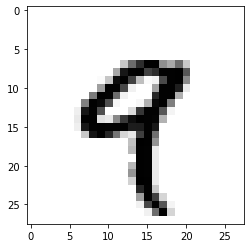

In [53]:
digit = train_images[4]
import matplotlib.pyplot as plt

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### 2.2.6 넘파이로 텐서 조작

이전 예제에서는 train_images[i] 같은 형식으로 첫번째 축을 따라 특정 숫자를 선택했었다. 배열에 있는 특정 원소들을 선택하는 것을 **슬라이싱** 이라고 한다. 넘파이 배열에서 할 수 있는 슬라이싱 연산을 살펴보자.

In [54]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [55]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [57]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [59]:
# 14x14 픽셀
my_slice = train_images[10:100, 0:14, 0:14]
my_slice.shape

(90, 14, 14)

### 2.2.7 배치 데이터

일반적으로 딥러닝에서 사용하는 모든 데이터 텐서의 첫번째 축은 샘플 축(sample axis)이다.^[샘플 차원(sample dimension)이라고도 부른다.] MNIST 예제에서는 숫자 이미지가 샘플이다.

딥러닝 모델은 한 번에 전체 데이터셋을 처리하지 않습니다. 그 대신 데이터를 작은 배치(batch)로 나눕니다.

```python
# 첫번째 배치
batch = train_images[:128]

# 2번째 배치
batch = train_images[128:256]

# n 번째 배치
batch = train_images[128 * n:128 * (n + 1)]
```

### 2.2.8 텐서의 실제 사례

우리가 앞으로 사용할 데이터는 대부분 다음 중 하나에 속할 것이다.

- 벡터 데이터 : `(samples, features)` 크기의 2D 텐서
- 시계열 데이터 또는 시퀀스(sequence) 데이터: `(samples, timesteps, features)` 크기의 3D 텐서
- 이미지: `(samples, height, width, channels)` 또는 (samples, channels, height, width)
- 동영상: `(samples, frames, height, width, channels)` 또는 (samples,  frames, channels, height, width) 크기의 5D 텐서

## 2.5 예제

In [65]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [69]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [76]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [78]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

- 이 네트워크는 2개의 Dense 층이 연결되어 있고 각 층은 가중치 텐서를 포함하여 입력 데이터에 대한 몇 개의 간단한 텐서 연산을 적용.
- 경사하강법을 적용하는 구체적인 방식은 첫번째 매개변수로 전달된 `rmsprop` 옵티마이저에 의해 결정.

In [79]:
# 네트워크 컴파일
network.compile(optimizer='rmsprop',
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

- `categorical_crossentropy` : 손실함수, 가중치 텐서를 학습하기 위한 피드백 신호로 사용되며 훈련하는 동안 최소화 된다.

In [80]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 1ms/step - loss: 2.3015 - accuracy: 0.1120
Epoch 2/5
469/469 [==============================] - 1s 1ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 3/5
469/469 [==============================] - 1s 1ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 4/5
469/469 [==============================] - 1s 1ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 5/5
469/469 [==============================] - 1s 1ms/step - loss: 2.3014 - accuracy: 0.1124


`-` fit 메서드 호출 결과

- 네트워크가 128개 샘플씩 미니배치로 훈련 데이터를 5번 반복. (전체 훈련 데이터에 수행되는 각 반복을 **에포크(epoch)** 라고 한다.

- 각 반복마다 네트워크가 배치에서 손실에 대한 가중치의 그래디언트를 계산하고 그에 맞추어 가중치를 업데이트.
    
- 다섯번의 에포크 동안 네트워크는 $2,345$번의 크래디언트 업데이트 수행. (에폭마다 469번)

In [82]:
60000/128 # 1에폭당 업데이트 횟수

468.75

In [84]:
60000/128*5 # 5에폭 업데이트 횟수

2343.75